**using instructions on this website** https://www.analyticsvidhya.com/blog/2020/06/guide-geospatial-analysis-folium-python/ 

https://colab.research.google.com/drive/1bMmPY9VrOkvKfGNEH9FVdg3weaGLwWQw?usp=sharing

In [1]:

import pandas as pd
import numpy as np
import folium
from folium import plugins
from folium.plugins import HeatMap
import geopy
from geopy.geocoders import Nominatim
from geopy import Nominatim

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import matplotlib.colors as mcolors
matplotlib.style.use('seaborn-whitegrid')

In [2]:
map_geneva=folium.Map(location=[46.2044, 6.1432], zoom_start=12, min_zoom=11,max_zoom=15)
map_geneva



In [3]:
# importing Google API data to notebook
df=pd.read_csv("../data/data_combined_v1.03.csv")

In [17]:
df.head()

,Unnamed: 0,name,place_id,types,price_level,rating,user_ratings_total,vicinity,plus_code.global_code,geometry.location.lat,geometry.location.lng
0,0,Café Restaurant Palma,ChIJX68uubZkjEcRKKxpZ7OrgqU,"['restaurant', 'food', 'point_of_interest', 'e...",NaN,3.7,141.0,"Av. d'Aïre 93bis, Genève",8FR86437+XJ,46.204921,6.114022
1,1,Restaurant La Tentation,ChIJd6kh67ZkjEcRC1IQourQOyo,"['restaurant', 'food', 'point_of_interest', 'e...",2.0,4.2,158.0,"Av. d'Aïre 91, Genève",8FR86447+3X,46.205283,6.114920
2,2,Nénuphar Café | Restaurant,ChIJt8c02LFkjEcRcbEARQLCYQo,"['restaurant', 'food', 'point_of_interest', 'e...",1.0,4.7,63.0,"Rte de l'Usine-à-Gaz 10, Vernier",8FR86445+C6,46.206069,6.108121
3,3,Restaurant Les Jardins du Rhône,ChIJV8uySFxljEcRn7XpIO3zZX0,"['restaurant', 'food', 'point_of_interest', 'e...",NaN,0.0,0.0,"Av. d'Aïre 89, Genève",8FR86448+36,46.205248,6.115503
4,4,Canteen De La Residence Gardens Du Rhône,ChIJW8zU8rZkjEcR_Ke8t7c7hVc,"['restaurant', 'food', 'point_of_interest', 'e...",NaN,5.0,1.0,"Av. d'Aïre 89, Genève",8FR86448+54,46.205387,6.115347


In [4]:
df.head()

,place_id,tripadvisor_id,fsq_id,name,business_status,types,price_level,ta_price_level,price_level_combined,rating,...,population_20_24,population_25_34,population_35_44,population_45_54,population_54_64,population_65+,resident_per_km2,brut_income_annual_per_person,district,district_cluster
0,ChIJd6kh67ZkjEcRC1IQourQOyo,7159041.0,4de685281f6e9d90c7f5325c,Restaurant La Tentation,OPERATIONAL,"['restaurant', 'point_of_interest', 'food', 'e...",2.0,2.0,3.0,4.2,...,1937,5163,5549,4924,4290,5625,16282,109266,Saint-Jean Charmilles,3
1,ChIJX68uubZkjEcRKKxpZ7OrgqU,13322506.0,NaN,Café Restaurant Palma,OPERATIONAL,"['restaurant', 'point_of_interest', 'food', 'e...",NaN,NaN,4.0,3.7,...,1937,5163,5549,4924,4290,5625,16282,109266,Saint-Jean Charmilles,3
2,ChIJPcYsG_BljEcR4kTFqBJJoK4,6720272.0,NaN,Le Versailles,OPERATIONAL,"['restaurant', 'point_of_interest', 'food', 'e...",NaN,2.0,3.0,3.9,...,1937,5163,5549,4924,4290,5625,16282,109266,Saint-Jean Charmilles,3
3,ChIJV8uySFxljEcRn7XpIO3zZX0,NaN,NaN,Restaurant Les Jardins du Rhône,OPERATIONAL,"['restaurant', 'food', 'point_of_interest', 'e...",NaN,NaN,NaN,NaN,...,1937,5163,5549,4924,4290,5625,16282,109266,Saint-Jean Charmilles,3
4,ChIJW8zU8rZkjEcR_Ke8t7c7hVc,NaN,NaN,Canteen De La Residence Gardens Du Rhône,OPERATIONAL,"['restaurant', 'food', 'point_of_interest', 'e...",NaN,NaN,4.0,5.0,...,1937,5163,5549,4924,4290,5625,16282,109266,Saint-Jean Charmilles,3


In [ ]:
#heat map, show restaurants with price levels 
#number of reviews 
#visualisation lecture 
# matplotlip, sns 

In [5]:
df.columns

Index(['place_id', 'tripadvisor_id', 'fsq_id', 'name', 'business_status',
       'types', 'price_level', 'ta_price_level', 'price_level_combined',
       'rating', 'user_ratings_total', 'ta_rating', 'ta_user_ratings_total',
       'combined_rating', 'geometry.location.lat', 'geometry.location.lng',
       'formatted_address', 'zip_code', 'city', 'international_phone_number',
       'website', 'google_category', 'ta_4sq_cuisine1', 'ta_4sq_cuisine2',
       'ta_4sq_cuisine3', 'ta_4sq_cuisine4', 'ta_4sq_cuisine5',
       'main_category_1', 'main_category_2', 'main_category_3',
       'main_category_4', 'combined_main_category', 'sub_category',
       'neighboorhood_area_km2', 'resident_population_total',
       'population_age_0_14', 'population_15_19', 'population_20_24',
       'population_25_34', 'population_35_44', 'population_45_54',
       'population_54_64', 'population_65+', 'resident_per_km2',
       'brut_income_annual_per_person', 'district', 'district_cluster'],
      dtype='o

In [6]:
# there is only one restaurant without total user rating
df[df["user_ratings_total"].isnull()]

,place_id,tripadvisor_id,fsq_id,name,business_status,types,price_level,ta_price_level,price_level_combined,rating,...,population_20_24,population_25_34,population_35_44,population_45_54,population_54_64,population_65+,resident_per_km2,brut_income_annual_per_person,district,district_cluster
3,ChIJV8uySFxljEcRn7XpIO3zZX0,NaN,NaN,Restaurant Les Jardins du Rhône,OPERATIONAL,"['restaurant', 'food', 'point_of_interest', 'e...",NaN,NaN,NaN,NaN,...,1937,5163,5549,4924,4290,5625,16282,109266,Saint-Jean Charmilles,3
6,ChIJN97gX2NljEcRfnSAXk9QFyE,NaN,NaN,Max Poulet,OPERATIONAL,"['restaurant', 'food', 'point_of_interest', 'e...",NaN,NaN,NaN,NaN,...,1937,5163,5549,4924,4290,5625,16282,109266,Saint-Jean Charmilles,3
7,ChIJNVpwC79kjEcRqKfKmxCTkgE,NaN,NaN,Au Siciliano DOC,OPERATIONAL,"['meal_takeaway', 'bar', 'restaurant', 'food',...",NaN,NaN,NaN,NaN,...,1937,5163,5549,4924,4290,5625,16282,109266,Saint-Jean Charmilles,5
17,ChIJo4Xwi8hkjEcRIhTrMrsxCJs,NaN,NaN,Tourist brazilian Restaurant,CLOSED_TEMPORARILY,"['restaurant', 'food', 'point_of_interest', 'e...",NaN,NaN,NaN,NaN,...,1937,5163,5549,4924,4290,5625,16282,109266,Saint-Jean Charmilles,2
18,ChIJF1L7wJlljEcRkJ_MywelYs8,NaN,NaN,Le Wagon,OPERATIONAL,"['restaurant', 'food', 'point_of_interest', 'e...",NaN,NaN,NaN,NaN,...,1937,5163,5549,4924,4290,5625,16282,109266,Saint-Jean Charmilles,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1544,ChIJu53yxkpljEcR4WgamWbBod8,NaN,NaN,Eliette Palluat,CLOSED_TEMPORARILY,"['restaurant', 'food', 'point_of_interest', 'e...",NaN,NaN,NaN,NaN,...,722,2175,2592,2309,1850,3109,13812,177681,Champel,40
1555,ChIJr2qDY0lljEcRXj5BAobIupc,NaN,NaN,Cave Nicolas,OPERATIONAL,"['restaurant', 'food', 'point_of_interest', 'e...",NaN,NaN,NaN,NaN,...,996,3839,3699,3048,2638,3503,15694,132730,Eaux-Vives - Lac,16
1556,ChIJL46f7F9ljEcRHBLsdIMBEww,23983964.0,NaN,Sushi Shop,OPERATIONAL,"['restaurant', 'food', 'point_of_interest', 'e...",NaN,NaN,4.0,NaN,...,996,3839,3699,3048,2638,3503,15694,132730,Eaux-Vives - Lac,16
1558,ChIJ1X22xEtljEcR2XUW_HlU1uA,NaN,NaN,10 Dieci Pizza Livraison & Take Away,OPERATIONAL,"['restaurant', 'food', 'point_of_interest', 'e...",NaN,NaN,NaN,NaN,...,996,3839,3699,3048,2638,3503,15694,132730,Eaux-Vives - Lac,16


In [7]:
df.rating

0       4.2
1       3.7
2       3.9
3       NaN
4       5.0
       ... 
1564    4.4
1565    3.0
1566    4.2
1567    4.3
1568    4.3
Name: rating, Length: 1569, dtype: float64

In [10]:
df[df.name.str.contains("restaurant")]

,place_id,tripadvisor_id,fsq_id,name,business_status,types,price_level,ta_price_level,price_level_combined,rating,...,population_20_24,population_25_34,population_35_44,population_45_54,population_54_64,population_65+,resident_per_km2,brut_income_annual_per_person,district,district_cluster
63,ChIJcab-icVljEcRsS43zEsbtIs,NaN,NaN,Cafe-restaurant Au fil de l'arve,OPERATIONAL,"['restaurant', 'point_of_interest', 'food', 'e...",NaN,NaN,NaN,NaN,...,2253,7285,5620,4812,3966,4362,23371,102007,Jonction - Plainpalais,13
200,ChIJ4WpqHa9ljEcRzZqRDsZLKVg,NaN,NaN,Eritrean restaurant (Union Nationale des Trava...,OPERATIONAL,"['restaurant', 'food', 'point_of_interest', 'e...",NaN,NaN,4.0,5.0,...,2253,7285,5620,4812,3966,4362,23371,102007,Jonction - Plainpalais,13
216,ChIJ3aVj2FhljEcR9jGg3zle3G8,NaN,NaN,Bowls Factory poke bowl restaurant,OPERATIONAL,"['restaurant', 'food', 'point_of_interest', 'e...",NaN,NaN,4.0,4.4,...,2253,7285,5620,4812,3966,4362,23371,102007,Jonction - Plainpalais,14
258,ChIJ85U5DNpkjEcRe6fShRHtuqY,NaN,NaN,Pizza Pâte kebab(kebap)restaurant,OPERATIONAL,"['restaurant', 'point_of_interest', 'food', 'e...",NaN,NaN,4.0,4.4,...,1611,5621,5389,4675,3853,4059,19143,103373,Grottes Saint-Gervais,22
260,ChIJgUpamNtkjEcR6_wQxmBrqn8,1045031.0,NaN,"Café, restaurant Le Portail",OPERATIONAL,"['cafe', 'restaurant', 'food', 'point_of_inter...",2.0,NaN,3.0,4.0,...,1356,3501,3555,3028,2668,3155,8608,107269,Grottes Saint-Gervais,22
283,ChIJN-1I9mxljEcRiMmQs8vVG7A,NaN,NaN,Ali restaurant Kebab,OPERATIONAL,"['restaurant', 'food', 'point_of_interest', 'e...",NaN,NaN,4.0,4.9,...,1611,5621,5389,4675,3853,4059,19143,103373,Grottes Saint-Gervais,22
610,ChIJu9o4VN9kjEcRHgBxxzNPc3c,3836250.0,NaN,"Café - restaurant ""Chez Lili""",OPERATIONAL,"['restaurant', 'food', 'point_of_interest', 'e...",NaN,2.0,3.0,4.3,...,1611,5621,5389,4675,3853,4059,19143,103373,Grottes Saint-Gervais,21
671,ChIJe6qF8rJljEcRMpI5T_oUC9E,19877591.0,NaN,restaurant mère royaume,OPERATIONAL,"['restaurant', 'point_of_interest', 'food', 'e...",NaN,NaN,4.0,NaN,...,528,1416,1277,1249,1070,1310,7554,191726,Cité-Centre,36
691,ChIJhzEzkidljEcRqcYvy_wn02Q,NaN,NaN,Cafe-restaurant la Gentiane Sa,OPERATIONAL,"['restaurant', 'point_of_interest', 'food', 'e...",NaN,NaN,NaN,NaN,...,1611,5621,5389,4675,3853,4059,19143,103373,Grottes Saint-Gervais,21
943,ChIJlZqpQtFljEcRzKyMrU2Rvf8,19432621.0,NaN,little Ethiopia cafe restaurant geneve,OPERATIONAL,"['restaurant', 'food', 'point_of_interest', 'e...",NaN,2.0,3.0,4.7,...,1356,3501,3555,3028,2668,3155,8608,107269,Pâquis Sécheron,27


In [11]:
round(df.corr(),2)

,tripadvisor_id,price_level,ta_price_level,price_level_combined,rating,user_ratings_total,ta_rating,ta_user_ratings_total,combined_rating,geometry.location.lat,...,population_15_19,population_20_24,population_25_34,population_35_44,population_45_54,population_54_64,population_65+,resident_per_km2,brut_income_annual_per_person,district_cluster
tripadvisor_id,1.00,-0.19,-0.05,0.18,0.17,-0.21,0.16,-0.36,0.26,-0.02,...,-0.02,-0.03,-0.01,-0.01,-0.01,-0.01,0.00,-0.01,-0.01,-0.05
price_level,-0.19,1.00,0.61,0.81,-0.01,0.07,0.01,0.25,-0.06,0.04,...,-0.17,-0.19,-0.16,-0.16,-0.15,-0.16,-0.17,-0.11,0.21,0.15
ta_price_level,-0.05,0.61,1.00,0.95,0.06,-0.06,0.06,0.08,0.04,0.06,...,-0.14,-0.17,-0.17,-0.15,-0.15,-0.14,-0.12,-0.14,0.14,0.06
price_level_combined,0.18,0.81,0.95,1.00,0.03,-0.25,0.05,-0.01,0.07,0.03,...,-0.04,-0.06,-0.05,-0.03,-0.03,-0.03,-0.02,-0.03,0.01,-0.00
rating,0.17,-0.01,0.06,0.03,1.00,-0.05,0.46,-0.01,0.94,-0.02,...,0.07,0.08,0.08,0.08,0.08,0.08,0.08,0.08,-0.10,-0.08
user_ratings_total,-0.21,0.07,-0.06,-0.25,-0.05,1.00,-0.16,0.54,-0.07,0.02,...,-0.04,-0.04,-0.03,-0.04,-0.03,-0.04,-0.05,-0.02,0.05,0.07
ta_rating,0.16,0.01,0.06,0.05,0.46,-0.16,1.00,-0.02,0.71,-0.01,...,0.06,0.09,0.10,0.09,0.08,0.08,0.07,0.09,-0.10,-0.02
ta_user_ratings_total,-0.36,0.25,0.08,-0.01,-0.01,0.54,-0.02,1.00,-0.06,0.07,...,-0.11,-0.13,-0.12,-0.11,-0.10,-0.11,-0.13,-0.10,0.13,0.11
combined_rating,0.26,-0.06,0.04,0.07,0.94,-0.07,0.71,-0.06,1.00,-0.01,...,0.09,0.10,0.10,0.10,0.09,0.10,0.10,0.09,-0.13,-0.10
geometry.location.lat,-0.02,0.04,0.06,0.03,-0.02,0.02,-0.01,0.07,-0.01,1.00,...,0.14,-0.08,-0.09,0.12,0.13,0.15,0.12,-0.15,-0.14,-0.19


In [32]:
# importing data to notebook foursquare data
df1=pd.read_csv("../raw_data/Raw_data_FourSquare.csv")

In [35]:
df1.head()

,Unnamed: 0,fsq_id,categories,name,price,rating,stats.total_ratings,geocodes.main.latitude,geocodes.main.longitude,location.formatted_address,location.locality,location.postcode,location.region
0,0,518635f0498e1c0b6eb9b1b6,"[{'id': 11045, 'name': 'Bank', 'icon': {'prefi...",National Bank Of Abu Dhabi,NaN,NaN,NaN,46.204841,6.142857,NaN,NaN,NaN,Genève
1,1,494a9c86641b44b6006c1b86,"[{'id': 17051, 'name': 'Watch Store', 'icon': ...",Vacheron & Constantin SA,NaN,NaN,NaN,46.204900,6.142894,"Rue des Moulins 1, 1204 Genève",Genève,1204.0,Genève
2,2,4ff5f912e8895184a80b00f8,"[{'id': 11045, 'name': 'Bank', 'icon': {'prefi...",Goldman Sachs Bank AG,NaN,NaN,NaN,46.204942,6.142812,"Rue des Moulins 1, 1211 Genève",Geneva,1211.0,Geneva
3,3,6fc12aaa8b3e4e3fdf6285ca,[],Pomery Capital SA,NaN,NaN,NaN,46.205135,6.143041,"Rue de la Tour-de-l'Ile 1, 1204 Genève",Genève,1204.0,Genève
4,4,dcbc0e2bb361465c3b2bbde8,"[{'id': 19028, 'name': 'Tourist Information an...",Delisle SA,NaN,NaN,NaN,46.205135,6.143041,"Rue de la Tour-de-l'Ille 1, 1204 Genève",Genève,1204.0,Genève


In [36]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19246 entries, 0 to 19245
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  19246 non-null  int64  
 1   fsq_id                      19246 non-null  object 
 2   categories                  19246 non-null  object 
 3   name                        19246 non-null  object 
 4   price                       1603 non-null   float64
 5   rating                      835 non-null    float64
 6   stats.total_ratings         835 non-null    float64
 7   geocodes.main.latitude      19246 non-null  float64
 8   geocodes.main.longitude     19246 non-null  float64
 9   location.formatted_address  18460 non-null  object 
 10  location.locality           17761 non-null  object 
 11  location.postcode           16640 non-null  float64
 12  location.region             18741 non-null  object 
dtypes: float64(6), int64(1), object

In [38]:
df1.categories.unique()

array(["[{'id': 11045, 'name': 'Bank', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/financial_', 'suffix': '.png'}}]",
       "[{'id': 17051, 'name': 'Watch Store', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/default_', 'suffix': '.png'}}]",
       '[]', ...,
       "[{'id': 10025, 'name': 'Drive-in Theater', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/movietheater_', 'suffix': '.png'}}, {'id': 13065, 'name': 'Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'suffix': '.png'}}]",
       "[{'id': 13031, 'name': 'Burger Joint', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/burger_', 'suffix': '.png'}}, {'id': 13068, 'name': 'American Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'suffix': '.png'}}, {'id': 13314, 'name': 'New American Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/newamer

In [4]:
def search_venue(df, category):
  search = lambda x:True if category.capitalize() in x else False
  venues = df[df['name'].apply(search)].reset_index(drop='index')
  venues_lat_long = list(zip(venues['geometry.location.lat'], venues['geometry.location.lng']))
  return venues_lat_long


def heatmap_venues(data):
    map=folium.Map(location=[46.204391, 6.143158], tiles="openstreetmap", zoom_start=11)
    HeatMap(data).add_to(map)
    return map

In [5]:
name_restaurant = search_venue(df, 'restaurant')
heatmap_venues(name_restaurant)

In [7]:
name_pizza = search_venue(df, 'pizza')
heatmap_venues(name_pizza)

In [28]:
df.loc[df["name"].str.contains("pizza", case=False)]


,Unnamed: 0,name,place_id,types,price_level,rating,user_ratings_total,vicinity,plus_code.global_code,geometry.location.lat,geometry.location.lng
42,42,"Autogrill Suisse SA Pizza et Pasta, Asia News ...",ChIJ57Ox0ZdkjEcRUsLH1dsP6JQ,"['restaurant', 'food', 'point_of_interest', 'e...",NaN,1.3,3.0,"Av. Louis-Casaï 27, Genève",8FR86497+H6,46.218968,6.113019
86,86,Pizza Mania Genève,ChIJ-Xcq1nZljEcR0q09-PcBzLY,"['restaurant', 'meal_delivery', 'meal_takeaway...",1.0,4.5,68.0,"Rue du Beulet 5, Genève",8FR8644G+25,46.205013,6.125499
109,109,KAPRiS KEBAP PIZZA TACOS,ChIJ_2QNS15ljEcR4rWSZa8RiOo,"['meal_takeaway', 'restaurant', 'food', 'point...",NaN,4.1,299.0,"Rte de Meyrin 4, Genève",8FR8647H+MJ,46.214193,6.128963
133,133,Poulet Pizzaland,ChIJyYmjXdJkjEcR0TnditF7DzY,"['restaurant', 'point_of_interest', 'food', 'e...",1.0,4.5,86.0,"Bd de Saint-Georges 2, Genève",8FR8642J+F8,46.201143,6.130761
151,151,Rolling Pizza Servette,ChIJWeF-pMNkjEcRFM0-x2UqV1A,"['meal_delivery', 'meal_takeaway', 'restaurant...",NaN,4.2,262.0,"Rte de Meyrin 6, Genève",8FR8647H+MG,46.214243,6.128789
164,164,Sindbad Pizza,ChIJGbdcugxljEcR4GFjvfytPeY,"['restaurant', 'food', 'point_of_interest', 'e...",1.0,4.7,68.0,"Rue de Saint-Jean 54, Genève",8FR8644J+3P,46.205161,6.131799
219,219,Pizza Prest'o Sàrl,ChIJ28DZ49xkjEcRtrL8JT8-UA4,"['restaurant', 'food', 'point_of_interest', 'e...",1.0,4.2,164.0,"Rue du Grand-Pré 45, Genève",8FR8647M+VG,46.214778,6.133874
241,241,Pizza Pâte kebab(kebap)restaurant,ChIJ85U5DNpkjEcRe6fShRHtuqY,"['restaurant', 'point_of_interest', 'food', 'e...",NaN,4.4,145.0,"Rue Voltaire 29, Genève",8FR8645M+6X,46.208056,6.135000
346,346,Au 6 pizza,ChIJbetEgNdkjEcRf4Y9MQ4CPBE,"['restaurant', 'point_of_interest', 'food', 'e...",1.0,4.4,154.0,"Rue Voltaire 6, Genève",8FR8644Q+XM,46.207394,6.139189
487,487,PizzaLand 10,ChIJ-c4wK9F6jEcREzwRMjNL79U,"['restaurant', 'food', 'point_of_interest', 'e...",1.0,4.0,264.0,"Rue de Carouge 73, Genève",8FR854RV+4F,46.190321,6.143659


In [8]:
df.loc[df["name"].str.contains("grill", case=False)]

,Unnamed: 0,name,place_id,types,price_level,rating,user_ratings_total,vicinity,plus_code.global_code,geometry.location.lat,geometry.location.lng
27,27,"Beau site grill, restaurant du P'tit Music'Hohl",ChIJgxEEi5lkjEcRltl_KqbFjDY,"['bar', 'restaurant', 'food', 'point_of_intere...",2.0,4.3,159.0,"Av. Louis-Casaï 54, Cointrin",8FR864F6+72,46.223233,6.110104
42,42,"Autogrill Suisse SA Pizza et Pasta, Asia News ...",ChIJ57Ox0ZdkjEcRUsLH1dsP6JQ,"['restaurant', 'food', 'point_of_interest', 'e...",NaN,1.3,3.0,"Av. Louis-Casaï 27, Genève",8FR86497+H6,46.218968,6.113019
51,51,Major Grill,ChIJSZEHjf9ljEcRkiWaLIJP8Go,"['restaurant', 'food', 'point_of_interest', 'e...",NaN,4.6,54.0,"Av. d'Aïre 43, Genève",8FR8644F+V6,46.207251,6.123072
232,232,NAAN & GRILL,ChIJZwGWpdRkjEcRY_HlhxUSoAU,"['meal_takeaway', 'restaurant', 'food', 'point...",1.0,4.6,136.0,"Bd Carl-Vogt 47, Genève",8FR854XM+GW,46.198806,6.134834
310,310,JOYEUSE GRILLADE,ChIJI8aqI-FkjEcRi7eE9JKYNtQ,"['restaurant', 'food', 'point_of_interest', 'e...",NaN,0.0,0.0,"Rue de Vermont, Genève",NaN,46.217907,6.136666
384,384,Picanha's Grill / Fusion Latina,ChIJZwrKo9lkjEcR1EGWipsYgX4,"['restaurant', 'food', 'point_of_interest', 'e...",NaN,3.9,312.0,"Rue de la Servette 15, Genève",8FR8645Q+R7,46.209542,6.138244
499,499,Grill Leschot,ChIJ37MavdR6jEcRxDC7YTo9Zwc,"['restaurant', 'food', 'point_of_interest', 'e...",NaN,4.8,49.0,"Rue Leschot 10, Plainpalais",8FR854WV+JM,46.196512,6.144204
627,627,Chez Philippe - Bar Grill,ChIJ8yFFGSlljEcRm_RqW1MdE9M,"['restaurant', 'food', 'bar', 'point_of_intere...",3.0,4.3,1507.0,"Rue du Rhône 8, Genève",8FR8643V+JR,46.204117,6.144532
662,662,Barbacoa Burgers & Grill Geneva,ChIJDWZhlnZljEcRm3P1g63KXBE,"['restaurant', 'point_of_interest', 'food', 'e...",NaN,3.9,35.0,"Rue de la Rôtisserie 29, Genève",8FR8643W+3W,46.202660,6.147330
988,988,L'Esquisse: Grill & Bar,ChIJxfjn0DBljEcRE3LmNCP60XM,"['restaurant', 'food', 'point_of_interest', 'e...",3.0,3.8,148.0,"Rue du Lac 7, Genève",8FR86534+QX,46.204454,6.157413


In [9]:
name_grill = search_venue(df, 'grill')
heatmap_venues(name_grill)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1116 entries, 0 to 1115
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1116 non-null   int64  
 1   name                   1116 non-null   object 
 2   place_id               1116 non-null   object 
 3   types                  1116 non-null   object 
 4   price_level            509 non-null    float64
 5   rating                 1115 non-null   float64
 6   user_ratings_total     1115 non-null   float64
 7   vicinity               1116 non-null   object 
 8   plus_code.global_code  1111 non-null   object 
 9   geometry.location.lat  1116 non-null   float64
 10  geometry.location.lng  1116 non-null   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 96.0+ KB


In [29]:
# so many missing values in price_level (509)
df.isnull().sum()  

Unnamed: 0                 0
name                       0
place_id                   0
types                      0
price_level              607
rating                     1
user_ratings_total         1
vicinity                   0
plus_code.global_code      5
geometry.location.lat      0
geometry.location.lng      0
dtype: int64

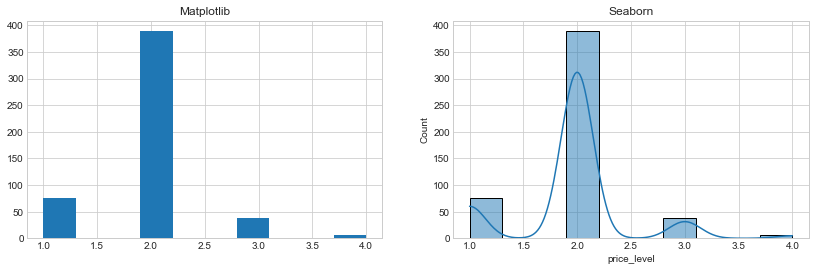

In [29]:
plt.figure(figsize=(14, 4))

plt.subplot(1, 2, 1)
plt.title('Matplotlib')
plt.hist(df['price_level'])

plt.subplot(1, 2, 2)
plt.title('Seaborn')
sns.histplot(df['price_level'], kde=True);

(array([ 82.,   0.,   7.,   0.,   5.,   6.,  20.,  87., 538., 370.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

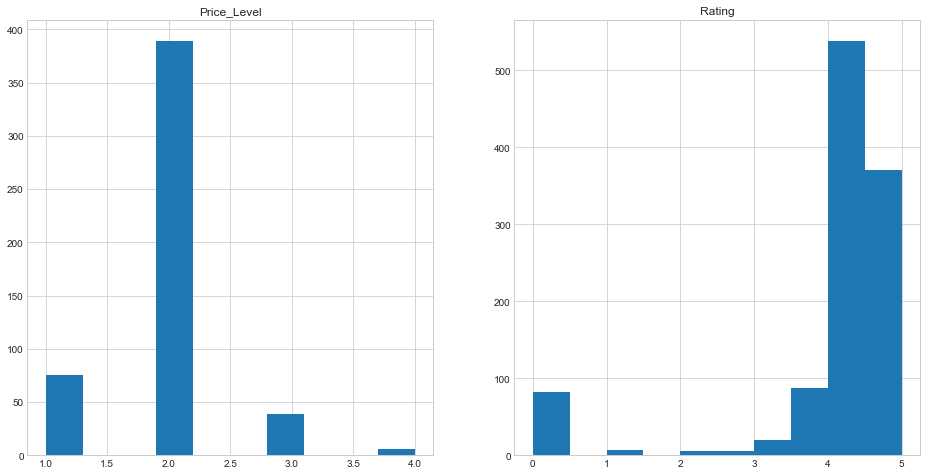

In [30]:
plt.figure(figsize=(16,8))

plt.subplot(1, 2, 1)
plt.title("Price_Level")
plt.hist(df["price_level"])

plt.subplot(1, 2, 2)
plt.title("Rating")
plt.hist(df["rating"])



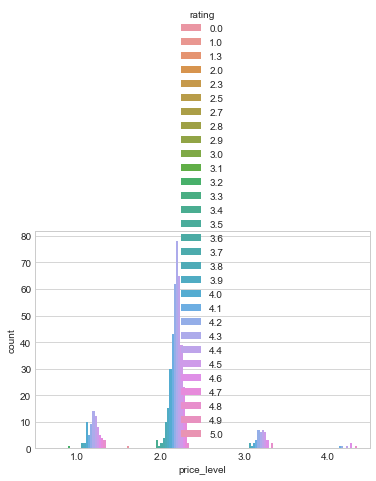

In [31]:
sns.countplot(x="price_level", hue="rating", data=df);

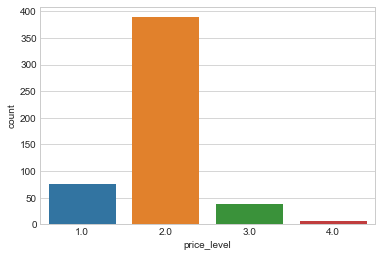

In [32]:
sns.countplot(x="price_level", data=df);

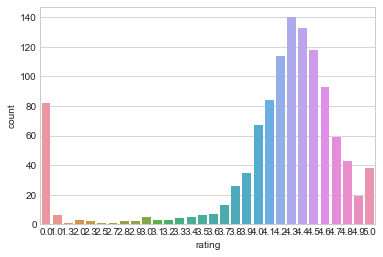

In [33]:
sns.countplot(x="rating", data=df);

<Figure size 1152x720 with 0 Axes>

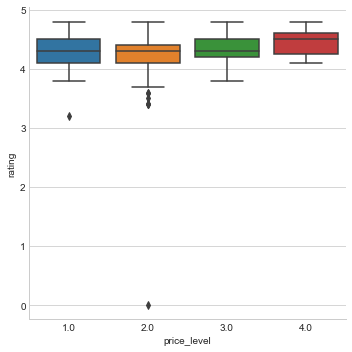

In [38]:
#Price level versus Ratings
plt.figure(figsize=(16, 10))
sns.catplot(x='price_level', y='rating', data=df, kind="box");

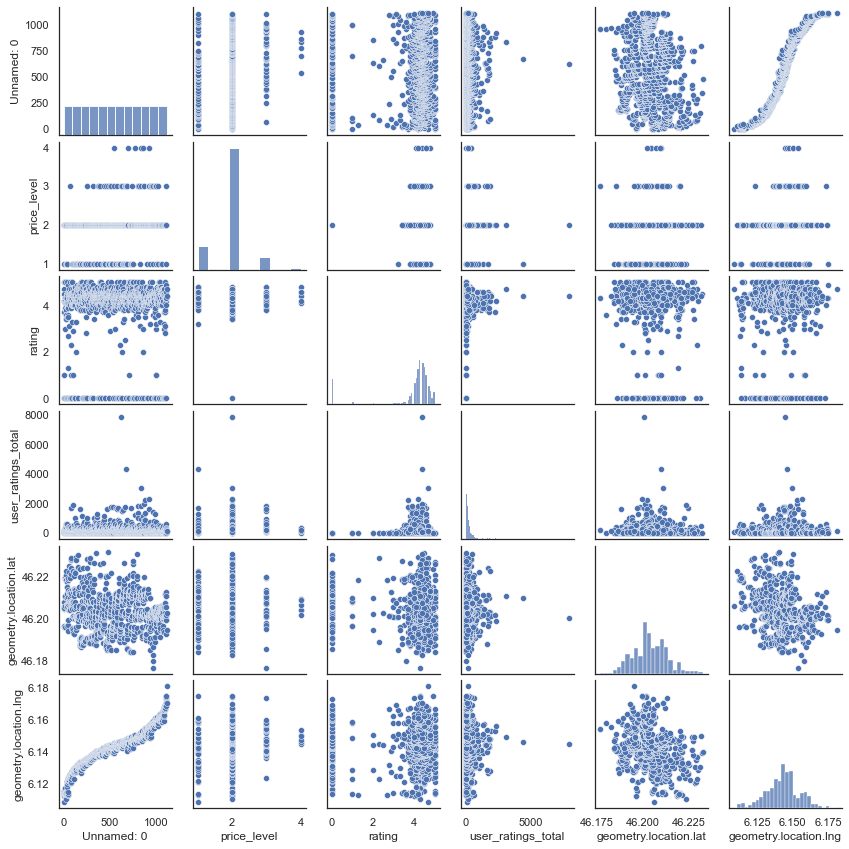

In [39]:
#correlations in the data, not neccessary in this case for this data


sns.set(style='white')
sns.pairplot(df, height=2)
plt.show()

In [39]:
df1.columns

Index(['Unnamed: 0', 'fsq_id', 'categories', 'name', 'price', 'rating',
       'stats.total_ratings', 'geocodes.main.latitude',
       'geocodes.main.longitude', 'location.formatted_address',
       'location.locality', 'location.postcode', 'location.region'],
      dtype='object')

Text(0, 0.5, 'Rating')

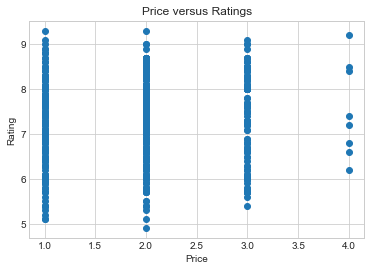

In [41]:
plt.scatter(df1["price"], df1["rating"])

plt.title('Price versus Ratings')
plt.xlabel('Price')
plt.ylabel('Rating')

In [43]:
df1["rating"].unique()  # in Foursquare data we have rating between 1-10, in the Google API between 1-5 

array([nan, 7.8, 8.2, 6.8, 7.4, 7.1, 5.4, 8. , 5.9, 6.7, 7.6, 7.2, 6.3,
       5.7, 7. , 6.6, 8.7, 6.9, 8.5, 6.2, 7.5, 5.8, 7.3, 6. , 6.5, 5.3,
       7.9, 8.3, 7.7, 6.4, 6.1, 8.6, 9. , 8.4, 8.1, 9.1, 8.9, 5.5, 8.8,
       5.6, 5.1, 5.2, 9.2, 5. , 9.3, 4.9])

In [44]:
df["rating"] # in Foursquare data we have rating between 1-10, in the Google API between 1-5 

0       3.7
1       4.2
2       4.7
3       0.0
4       5.0
       ... 
1111    4.9
1112    4.3
1113    4.6
1114    4.4
1115    4.7
Name: rating, Length: 1116, dtype: float64

In [49]:
df1.name[]

0                               National Bank Of Abu Dhabi
1                                 Vacheron & Constantin SA
2                                    Goldman Sachs Bank AG
3                                        Pomery Capital SA
4                                               Delisle SA
                               ...                        
19241                                     YKS diffusion SA
19242                                   GP Management Sàrl
19243            Société Immobilière Chemin de Ruth 107 SA
19244    Société Coopérative De Construction Et D'habit...
19245                                      Grange & Cie SA
Name: name, Length: 19246, dtype: object

In [55]:
# restaurants which has "restaurant" in their name

restaurant=df1.loc[df1["name"].str.contains("restaurant")]

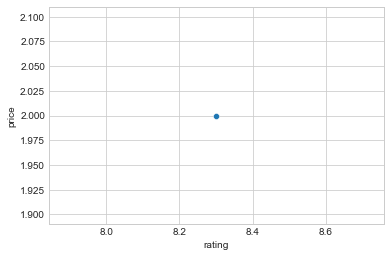

In [56]:
with sns.axes_style('whitegrid'): 
    # sns.set(style="whitegrid") for global change
    sns.scatterplot(x="rating", y="price", data=restaurant)